<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v11A_REPORTLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from datetime import datetime

def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [4]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection



START_DATE = "2023-12-26"  # @param {type: "date"}
END_DATE = "2024-02-15"  # @param {type: "date"}
REPORT_DATE = "2024-02-18"  # @param {type: "date"}
INVESTOR_NAME = "Erkan İzmirli" # @param {type:"string"}
YAHOO_PF_FILE = "NEG_SHARPE.csv" # @param {type:"string"}
BEST_PORTFOLIO_FILE = "Best_PF_For_bist30.csv" # @param {type:"string"}
REPORT_FILE = f"MM_Portfolio_Report_{INVESTOR_NAME}_{END_DATE}" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
#LOOKBACK = 47 # @param {type:"number"}
PURSE = 1000000  # @param {type: "number"}

EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']
# @markdown ---

BEST_PORTFOLIO_FILE = f"Best_PF_For_{EXCHANGE}.csv"



In [5]:
DELTA_DAYS = days_between(START_DATE, END_DATE)
DELTA_DAYS
LOOKBACK = DELTA_DAYS
LOOKBACK

51

In [6]:
REPORT_DATE


'2024-02-18'

In [7]:
def LoadFileFromGithub(src_dir,csv_file):
  user = "MarkovMarkowitz"
  repo = "MarkovMarkowitz"
  url = f"https://raw.githubusercontent.com/{user}/{repo}/{src_dir}/{csv_file}"
  !wget --no-cache --backups=1 {url}

In [8]:
LoadFileFromGithub( src_dir = "main/XLS-CSV", csv_file = BEST_PORTFOLIO_FILE)
LoadFileFromGithub( src_dir = "main/CUSTOMERS", csv_file = YAHOO_PF_FILE)
LoadFileFromGithub( src_dir = "main", csv_file = "MARKOVMAR5.1.png")
LoadFileFromGithub( src_dir = "main", csv_file = "Verdana.ttf")



--2024-02-20 19:32:04--  https://raw.githubusercontent.com/MarkovMarkowitz/MarkovMarkowitz/main/XLS-CSV/Best_PF_For_bist30.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 924 [text/plain]
Failed to rename Best_PF_For_bist30.csv to Best_PF_For_bist30.csv.1: (2) No such file or directory
Saving to: ‘Best_PF_For_bist30.csv’

Best_PF_For_bist30. 100%[===================>]     924  --.-KB/s    in 0s      

2024-02-20 19:32:04 (31.6 MB/s) - ‘Best_PF_For_bist30.csv’ saved [924/924]

--2024-02-20 19:32:04--  https://raw.githubusercontent.com/MarkovMarkowitz/MarkovMarkowitz/main/CUSTOMERS/NEG_SHARPE.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

In [9]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2024-02-20
51 days before current date:  2023-12-31
0 days before current date:  2024-02-21


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [10]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.5 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88650 sha256=50ac94e54cd9f3875bcafc2de802c85de8d2b8e1ec6cf080bf8933d683ab5389
  Stored in directory: /root/.cache/pip/wheels/71/38/bc/e53700cfd8b0ad6b539d2fbaaf060ed8a299e7622a5b86ef42
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39754 sha256=a658ebd0645b43cd7992c07fdd667073a604b67f7aa25065029c209bae4a45cb
  Stored in directory: /root/.cache/pip/wheels/0e/2e/f2/d6d2d9a1eb8fbbd9949bb5d4c00f753e3b74e5bd7ed10b1d36
Successfully built pyfolio empyrical


/usr/local/lib/python3.10/dist-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [11]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
#shopping_list_file = SHOPPING_LIST_FILE




In [12]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


# def LoadFile(file):
#   my_file = Path(f"/content/{file}")
#   if my_file.is_file():
#     print(f"File {file} is present")
#   else:
#     print(f"Please upload {file} to be analysed:")
#     print(70*'=')
#     data = files.upload_file(file)
#     display(data)

# LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

# LoadFile(best_pf_file)




In [13]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
IPEKE.IS,IPEKE.IS,41.30,2024/02/16,17:09 TRT,1.139999,40.44,41.66,40.08,9595534,20231226,29.82,623.0,NaN,NaN,NaN,NaN,18577.86,25729.90,38.497653
GUBRF.IS,GUBRF.IS,207.30,2024/02/16,17:09 TRT,-4.000000,212.70,218.90,206.50,21573800,20231226,172.60,232.0,NaN,NaN,NaN,NaN,40043.20,48093.60,20.104287
AKFGY.IS,AKFGY.IS,2.55,2024/02/16,17:09 TRT,0.020000,2.53,2.60,2.50,138222409,20231226,1.75,21828.0,NaN,NaN,NaN,NaN,38199.00,55661.40,45.714286
KOZAL.IS,KOZAL.IS,24.02,2024/02/16,17:09 TRT,0.900000,23.24,24.20,23.20,167598454,20231226,18.99,8588.0,NaN,NaN,NaN,NaN,163086.12,206283.76,26.487625
AHGAZ.IS,AHGAZ.IS,13.36,2024/02/16,17:09 TRT,-0.080000,13.45,13.64,13.33,10815209,20231226,9.62,48279.0,NaN,0.0,NaN,NaN,464443.98,645007.44,38.877339
TUKAS.IS,TUKAS.IS,8.80,2024/02/16,17:09 TRT,0.210000,8.64,8.95,8.62,30426666,20231226,6.30,42190.0,0.0,NaN,NaN,NaN,265797.00,371272.00,39.682540


In [14]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [15]:
MYPF.sort_values( by=["End PF %"], ascending=[False], inplace = True)


In [16]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [17]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

1352048.0999999999

In [18]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


MYPF


<ipython-input-18-beac00211cd0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-18-beac00211cd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
AHGAZ.IS,48279.0,9.62,464443.98,13.36,645007.44,46.90656,47.70595,38.877339,645007.0,48278.0
TUKAS.IS,42190.0,6.30,265797.00,8.80,371272.00,26.84419,27.45997,39.682540,371272.0,42190.0
KOZAL.IS,8588.0,18.99,163086.12,24.02,206283.76,16.47090,15.25713,26.487625,206283.0,8587.0
AKFGY.IS,21828.0,1.75,38199.00,2.55,55661.40,3.85791,4.11682,45.714286,55661.0,21827.0
GUBRF.IS,232.0,172.60,40043.20,207.30,48093.60,4.04417,3.55709,20.104287,48093.0,231.0
IPEKE.IS,623.0,29.82,18577.86,41.30,25729.90,1.87627,1.90303,38.497653,25729.0,622.0


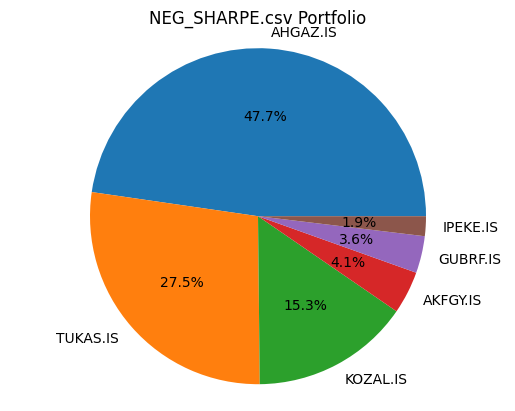

In [19]:

def PiePlot(DataFrame, name):
  import pandas as pd
  import matplotlib.pyplot as plt

  # Get the data
  df = DataFrame

  # Sort the data
  df = df.sort_values(by="End PF %", ascending=False)

  # Create the pie chart

  plt.pie(df["End PF %"], labels=df.index, autopct="%1.1f%%")
  plt.axis("equal")

  plt.title(f"{name} Portfolio")
  plt.show()


PiePlot(MYPF, YAHOO_PF_FILE)

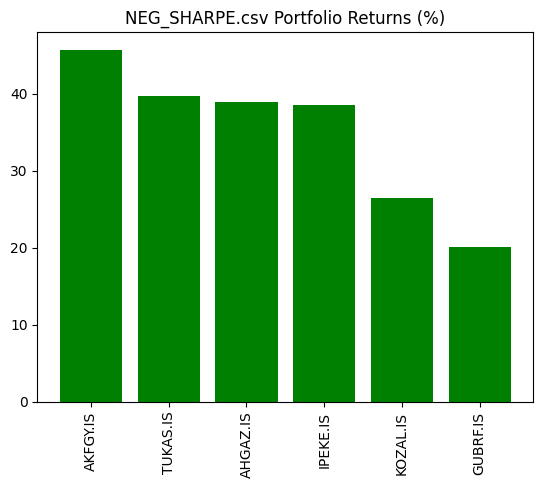

In [20]:
 def BarPlot(DataFrame, name):
  import pandas as pd
  import matplotlib.pyplot as plt
  # Get the data
  df = DataFrame
  # Sort the data
  df = df.sort_values(by="PnL %", ascending=False)

  # Create the bar chart or returns
  plt.bar(df.index, df["PnL %"], color="green", align="center")
  plt.xticks(rotation=90)

  plt.title(f"{name} Portfolio Returns (%)")
  plt.show()


BarPlot(MYPF, YAHOO_PF_FILE)

In [21]:
def DownloadAssetsAndWriteToCSVs(names):
  global START_DATE
  global END_DATE
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [22]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()

    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable

    OrderedTable = OrderedTable.dropna() # drop NaN

    print("Ordered Table: \n --------------------------------------\n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    print(f"\n Initial prices: \n{portfolio.InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    print(f"\n Final prices: {portfolio.FinalPrices} \n")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    #portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares
    portfolio['Portfolio_Shares'] = MYPF.Quantity
    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)


    Prices = OrderedTable.iloc[:,1:].values
    print("Prices: \n --------------------------------------\n",Prices.T)

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    print("FirstPrices: \n --------------------------------------\n",FirstPrices)


    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    print("portfolio['Portfolio_Shares']: \n --------------------------------------\n",portfolio['Portfolio_Shares'])

    print(f"\n prices: \n ---------------------\n {Prices}")

    print(f"\n OrderedTable['PF_Value']: \n ---------------------\n {OrderedTable['PF_Value']}")


    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli

    return OrderedTable, portfolio

In [23]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        from IPython.display import Image
        Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [24]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
AHGAZ.IS,48279.0,9.62,464443.98,13.36,645007.44,46.90656,47.70595,38.877339,645007.0,48278.0
TUKAS.IS,42190.0,6.30,265797.00,8.80,371272.00,26.84419,27.45997,39.682540,371272.0,42190.0
KOZAL.IS,8588.0,18.99,163086.12,24.02,206283.76,16.47090,15.25713,26.487625,206283.0,8587.0
AKFGY.IS,21828.0,1.75,38199.00,2.55,55661.40,3.85791,4.11682,45.714286,55661.0,21827.0
GUBRF.IS,232.0,172.60,40043.20,207.30,48093.60,4.04417,3.55709,20.104287,48093.0,231.0
IPEKE.IS,623.0,29.82,18577.86,41.30,25729.90,1.87627,1.90303,38.497653,25729.0,622.0


In [25]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)





Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close    Volume  Dividends  \
Date                                                                         
2024-01-02 00:00:00+03:00  10.25  10.55  10.25  10.31   9060918        0.0   
2024-01-03 00:00:00+03:00  10.39  10.39   9.85   9.90   9493398        0.0   
2024-01-04 00:00:00+03:00  10.01  10.15   9.85  10.15   4933550        0.0   
2024-01-05 00:00:00+03:00  10.15  10.26  10.05  10.21   5347975        0.0   
2024-01-08 00:00:00+03:00  10.25  10.41  1

In [26]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100
print(f"Average return of the current portfolio is {np.mean(OrderedTimeSeries['pct_change'].dropna()) *100} %")

Average return of the current portfolio is 0.5268111798288913 %


Showing Tearsheet of NEG_SHARPE.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2024-01-03
End date,2024-02-20
Total months,1
,Backtest
Annual return,268.6%
Cumulative returns,19.9%
Annual volatility,20.1%
Sharpe ratio,6.62
Calmar ratio,81.80
Stability,0.96
Max drawdown,-3.3%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************

Error generating returns tear sheet: 'NoneType' object has no attribute 'savefig'


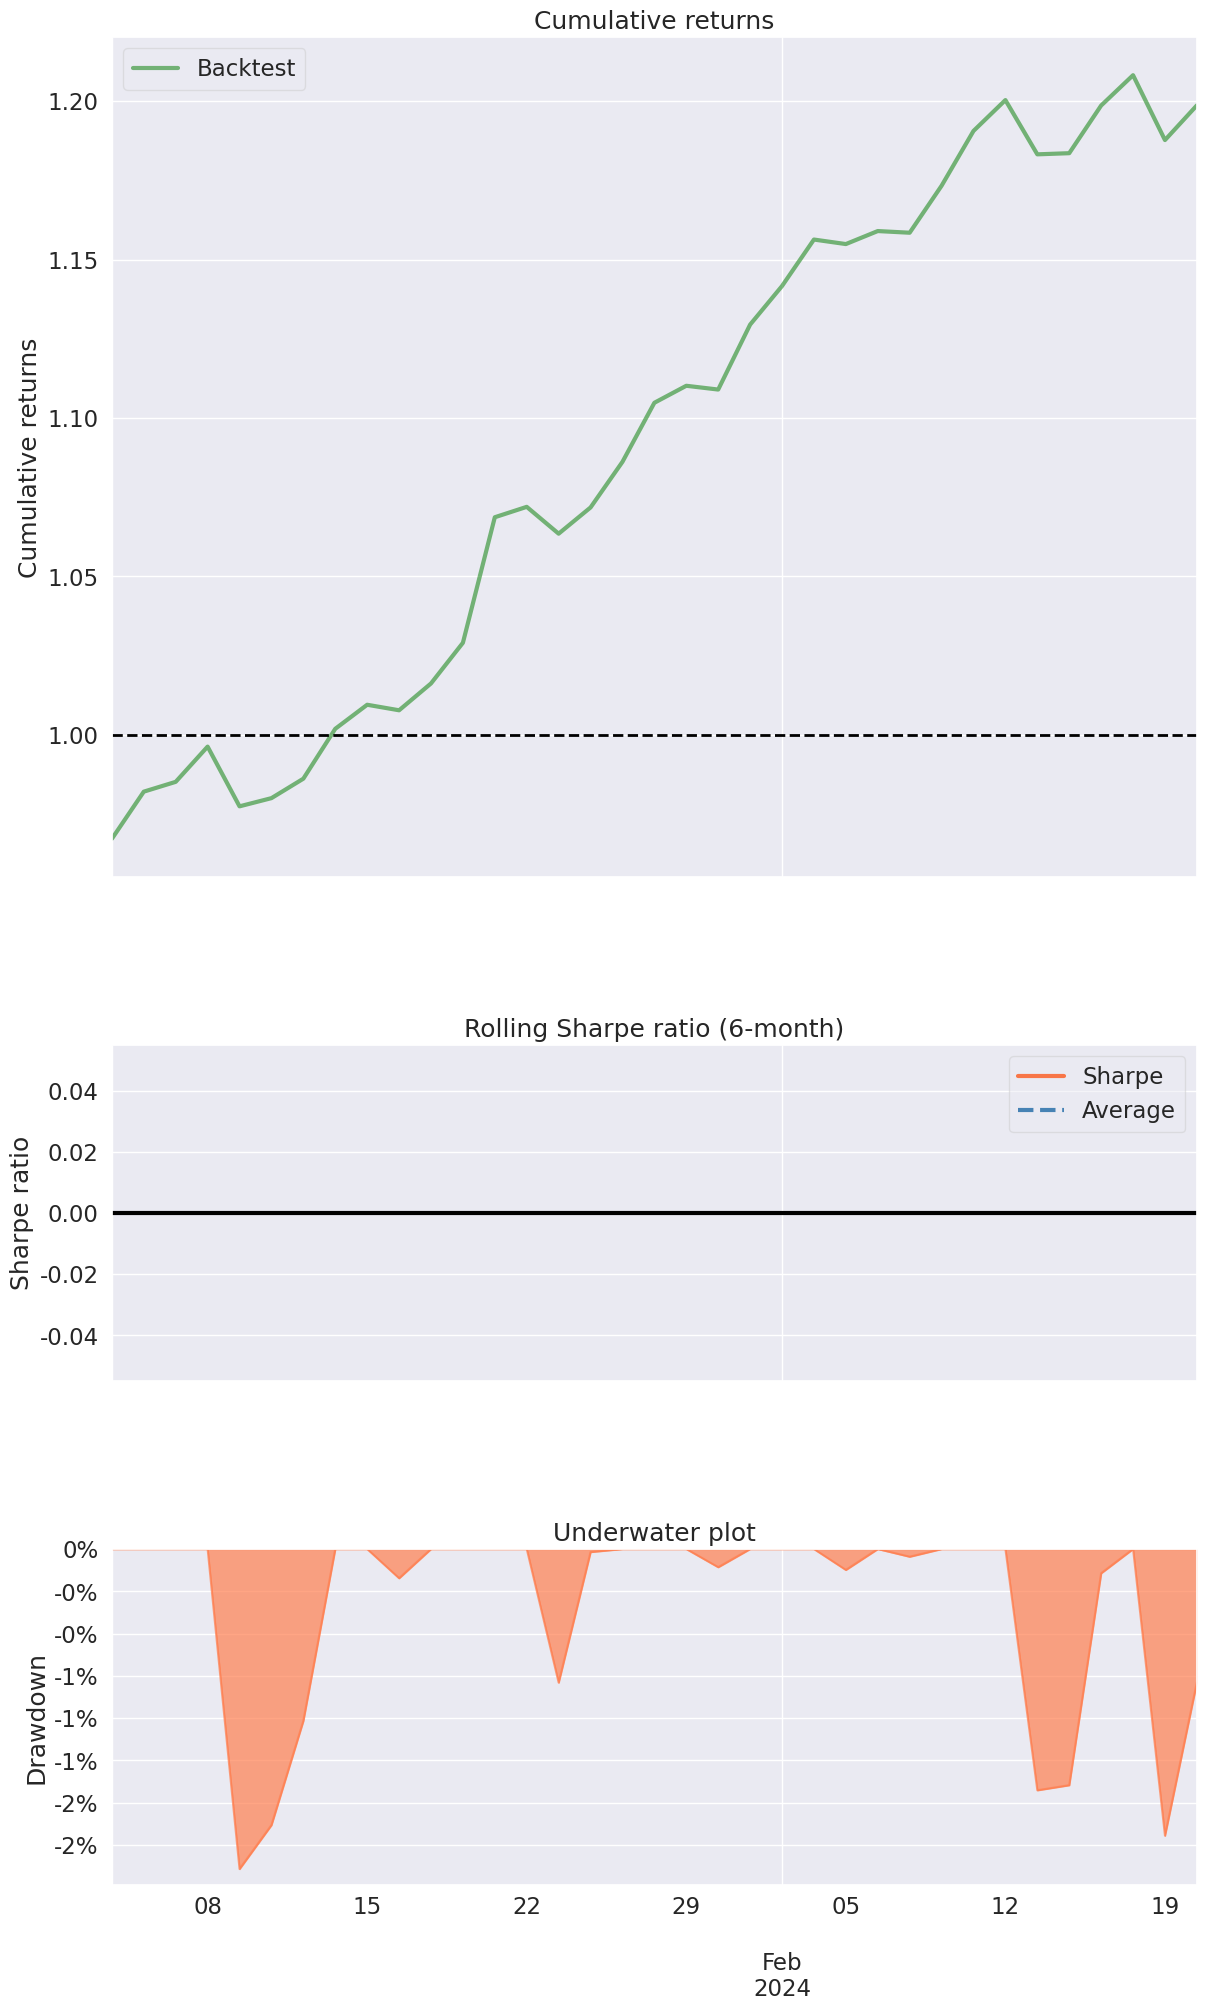

In [27]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [28]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-28-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-28-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-28-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical

Annual return           2.686259
Cumulative returns      0.198650
Annual volatility       0.200668
Sharpe ratio            6.615723
Calmar ratio           81.799864
Stability               0.963037
Max drawdown           -0.032839
Omega ratio             2.933255
Sortino ratio          11.075046
Skew                   -0.662334
Kurtosis                1.981253
Tail ratio              1.000744
Daily value at risk    -0.020014
dtype: float64

In [29]:
IDEAL_PF[['Portfolio_Shares', 'End PF %', 'Market Value', 'PnL %']]

,Portfolio_Shares,End PF %,Market Value,PnL %
Symbol,,,,
AHGAZ.IS,48279.0,47.70,638731.17,30.35
TUKAS.IS,42190.0,27.50,368318.70,25.87
KOZAL.IS,8588.0,15.40,206283.76,21.64
AKFGY.IS,21828.0,3.93,52605.48,26.29
GUBRF.IS,232.0,3.54,47351.20,20.28
IPEKE.IS,623.0,1.93,25879.42,28.97


In [30]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [31]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [32]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [33]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [34]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [35]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [36]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [37]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['AHGAZ.IS',
 'TUKAS.IS',
 'KOZAL.IS',
 'AKFGY.IS',
 'GUBRF.IS',
 'IPEKE.IS',
 'TRY=X']

In [38]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [39]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 7 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 7 TICKERS from BIST30
****************************************************************


In [40]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [41]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [42]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")
pf_data

,AHGAZ,TUKAS,KOZAL,AKFGY,GUBRF,IPEKE,TRY=X
Date,,,,,,,


In [43]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [44]:
def NextStep():
    global STEP
    STEP+=1
    print(70*'_')
    print(f"\nPerforming STEP-{STEP}:")

def NextChart():
    global CHART
    CHART+=1




In [45]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [46]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [47]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid val

array([0.01605589, 0.11361109, 0.16946794, 0.00604385, 0.04311689,
       0.484549  , 0.16715535])

In [48]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [49]:
Optimal_weights_for_Percent_Returns = FindWeights()

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.0161 0.1136 0.1695 0.006  0.0431 0.4845 0.1672]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid val

In [50]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
IPEKE.IS    655067.30
KOZAL.IS    229172.15
TRY=X       226062.44
TUKAS.IS    153592.66
GUBRF.IS     58273.27
AHGAZ.IS     21767.97
Name: Amount in 1352048.0999999999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid val

In [51]:
fn =  f"Best_PF_For_{EXCHANGE}.csv"
print("making operation with ",fn)
Array_BESTPF_weights = np.array(pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['End PF %']/100)
assets = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")['assets']
Markowitz_PF = pd.read_csv(f"Best_PF_For_{EXCHANGE}.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

making operation with  Best_PF_For_bist30.csv
% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
ASELS.IS    660610.70
AKBNK.IS    412104.26
TCELL.IS    216327.70
YKBNK.IS     37181.32
FROTO.IS     18252.65
Name: Amount in 1352048.0999999999 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid val

In [52]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,16,ASELS.IS,49.51,49510.0,44.18,1120.0,0.4951,41.44,44.18,49510.0,1194,49479.36,52750.92,6.61,49.72,48.86,48860.0,44.18,1120.0
1,6,AKBNK.IS,26.49,26490.0,38.04,696.0,0.2649,30.62,38.04,26490.0,865,26486.30,32904.60,24.23,26.62,30.48,30480.0,38.04,696.0
2,11,TCELL.IS,18.92,18920.0,53.00,356.0,0.1892,57.94,53.00,18920.0,326,18888.44,17278.00,-8.53,18.98,16.00,16000.0,53.00,356.0
3,2,YKBNK.IS,2.42,2420.0,20.06,120.0,0.0242,16.27,20.06,2420.0,148,2407.96,2968.88,23.29,2.42,2.75,2750.0,20.06,120.0
4,21,FROTO.IS,1.87,1870.0,728.00,2.0,0.0187,858.71,728.00,1870.0,2,1717.42,1456.00,-15.22,1.73,1.35,1350.0,728.00,2.0
5,4,BIMAS.IS,0.79,790.0,301.00,2.0,0.0079,267.35,301.00,790.0,2,534.70,602.00,12.59,0.54,0.56,560.0,301.00,2.0


In [53]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
ASELS.IS    48.86
AKBNK.IS    30.48
TCELL.IS    16.00
YKBNK.IS     2.75
FROTO.IS     1.35
Name: %, dtype: float64

In [54]:
np.round(Markowitz_Weights,2)

,%,Amount in 1352048.0999999999 TL
assets,,
ASELS.IS,48.86,660610.70
AKBNK.IS,30.48,412104.26
TCELL.IS,16.00,216327.70
YKBNK.IS,2.75,37181.32
FROTO.IS,1.35,18252.65


In [55]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'AHGAZ': -645007.39, 'TUKAS': -371272.0, 'KOZAL': -206283.74, 'AKFGY': -55661.39, 'GUBRF': -48093.57, 'IPEKE': -25729.88, 'ASELS': 660610.7, 'AKBNK': 412104.26, 'TCELL': 216327.7, 'YKBNK': 37181.32, 'FROTO': 18252.65}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
        Buy/Sell
AHGAZ -645007.39
TUKAS -371272.00
KOZAL -206283.74
AKFGY  -55661.39
GUBRF  -48093.57
IPEKE  -25729.88
ASELS  660610.70
AKBNK  412104.26
TCELL  216327.70
YKBNK   37181.32
FROTO   18252.65
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          16  ASELS.IS  49.51  49510.0      44.18         1120.0   
1           6  AKBNK.IS  26.49  26490.0      38.04          696.0   
2          11  TCELL.IS  18.92  18920.0      53.00          356.0   
3           2  YKBNK.IS   2.42   2420.0      20.06          120.0   
4          21  FROTO.IS   1.87   1870.0     728.00            2.0   
5           4  BIMAS.IS   0.7

In [56]:
!pip install nbconvert

______________________________________________________________________

Performing STEP-1:
Drawing 36-day performance (USD)


<Figure size 1600x1200 with 0 Axes>

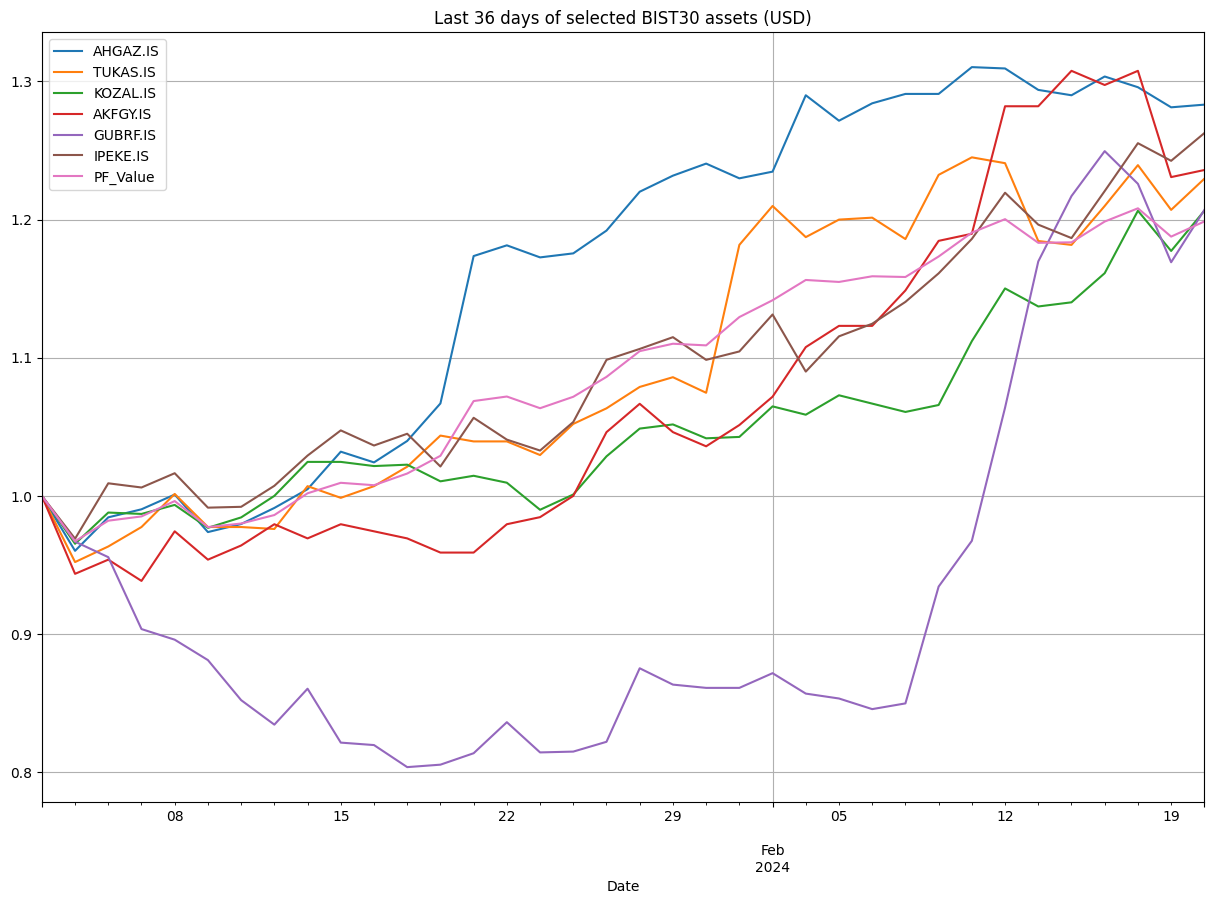

In [57]:
def DrawSelectedAssetsPerformance(pf_data):
    import matplotlib.pyplot as plt
    NextStep()
    NextChart()
    print(f"Drawing {pf_data.shape[0]}-day performance (USD)")
    print(70*'=')

    from PIL import Image as im
    fig = plt.figure(dpi=250) # plt.figure()
    #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
    (pf_data/pf_data.iloc[0]).plot(figsize = (15,10))
    plt.grid(True)
    plt.title(f"Last {pf_data.shape[0]} days of selected {exchange} assets (USD)")
    plt.savefig(f"Chart_Performance.jpg", format='jpg', dpi=300)
    from IPython.display import Image
    Image(url=f"Chart_Performance.jpg")


DrawSelectedAssetsPerformance(OrderedTimeSeries.iloc[:,:7])

In [58]:
import sys
!{sys.executable} -m pip install reportlab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00


In [63]:
def GenerateReportInPDF():
# import sys
# !{sys.executable} -m pip install reportlab
# EGER YUKLENEMEYEN BIR KUTUPHANE VARSA BU ŞEKİLDE YÜKLE
# GPT-4 komutu:
# even if I loaded reportlab library by pip it gives error ModuleNotFoundError: No module named 'reportlab'. why can that be ?


    from reportlab.lib.pagesizes import A4, A3
    from reportlab.platypus import SimpleDocTemplate, PageBreak, Paragraph, Image, Spacer, Frame, PageTemplate, Table, TableStyle
    from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle
    from reportlab.lib.units import inch
    from reportlab.lib.enums import TA_CENTER
    from reportlab.pdfbase import pdfmetrics
    from reportlab.pdfbase.ttfonts import TTFont
    from reportlab.lib import colors
    from reportlab.lib import utils

    import csv

    # Final_TEFAS_PF.to_csv(filename_statement + ".csv")
    # # Data from CSV
    # with open(filename_statement + ".csv", "r") as csvfile:
    #     dataTEFAS = list(csv.reader(csvfile))


    pdfmetrics.registerFont(TTFont('Verdana', 'Verdana.ttf'))


    style = getSampleStyleSheet()
    headingStyle = ParagraphStyle('Heading1',
                               fontName="Verdana",
                               fontSize=16,
                               parent=style['Heading2'],
                               alignment=1,
                               spaceAfter=14)


    # Register a new font that supports Turkish characters
    #pdfmetrics.registerFont(TTFont('Times New Roman Bold Italic', 'Times New Roman Bold Italic.ttf'))


    # Create a PDF with 'report.pdf' as its name
    doc = SimpleDocTemplate(f"{REPORT_FILE}.pdf", pagesize=A4)

    # Prepare an empty list to store the elements to be added to the PDF
    elements = []



    styles = getSampleStyleSheet()
    # Define a style
    style_heading1 = styles['Heading1']
    style_subtitle = styles['Heading2']
    style_table = styles['Normal']


    style_normal = styles['Normal']
    style_normal.fontName = 'Verdana'


    style_title = ParagraphStyle(name="CenteredTitle",
                                 parent=styles["Title"],
                                 fontName='Verdana',
                                 fontSize=24,
                                 leading=32,
                                 spaceAfter=6,
                                 alignment=TA_CENTER)



    # Title Page
    im = Image('MARKOVMAR5.1.png', 5 * inch, 2 * inch)

    elements.append(im)

    # Add a space
    elements.append(Spacer(1, 12))

    elements.append(Paragraph("Portföy Dönem Raporu", style_title))

    # Add a space
    elements.append(Spacer(1, 12))


    # style_normal = ParagraphStyle(name="NormalText",
    #                              parent=styles["Normal"],
    #                              fontName='Verdana',
    #                              fontSize=16,
    #                              spaceAfter=6,
    #                              alignment='TA_JUSTIFY')

    # Introduction
    intro_text = f"""
    BinPortföy(TM) Portföy Yönetim Sistemi <br/>
    Yapay Zeka Tabanlı Portföy Tasarım ve Performans Yönetim Sistemi <br/>
    Markov Markowitz Şirketi @2024. Tüm Hakları saklıdır <br/>
    Python and Markdown kodlama: Alper Ülkü <br/>
    BU RAPOR {REPORT_DATE} TARİHİNDE YAPAY ZEKA TARAFINDAN HAZIRLANMIŞTIR. <br/>

    """

    elements.append(Paragraph(intro_text, style_normal))
    elements.append(Spacer(1, 12))

    elements.append(Paragraph(f"""

        Sayın Yatırımcımız, <br/> <br/>
        {START_DATE} tarihinden itibaren {PURSE} TL bedelli portföyünüzün yönetimini birlikte yapmaktayız.
        Her gün portföyünüz her yönü ile takip edilmekte, uyumsuz veya aniden fiyatı düşen hisselerin kontrolü yapılmakta, temettü, bedelli ve bedelsiz sermaye artırımları
        varsa bu konularda da sizlere bilgi aktarılmaktadır. <br/>
""", style_normal))

    # Add a space
    elements.append(Spacer(1, 12))

    elements.append(Spacer(1, 12))

    elements.append(Paragraph("Executive Summary", style_heading1))


    summary_text = """
      Tarih: 15.02.2024 <br/>
      Yatırımcı: Sn. Erkan İzmirli <br/>
      Portföy Başlangıç miktarı: 294.132,04 TL (P1) <br/>
      Mevcut Bakiye: 354.980,17 TL (P2) <br/>
      Brüt Kazanç: +60.847,13 (+20.69%) (P3 = P2-P1) <br/>
      15.02.2024 itibariyle Komisyon Tutarı = (P3) * 0.07 = +4.259,37 TL (%1,44) <br/>
      15.02.2024 itibariyle Net KAR Tutarı = (P3) * 0.93 = +56.588,76 TL (%19,24) <br/>
      Portföydeki takvim günü sayısı = 59 gün <br/>
      Borsanın açık olduğu gün sayısı = 44 gün <br/>
      Günlük ortalama kazanç = 1382 TL (= %0,47)<br/>
      Aylık ortalama kazanç = 30.243,56 TL (= %10,28)<br/>


    """

    t1 = Table(np.array(IDEAL_PF[['Portfolio_Shares', 'End PF %', 'Market Value', 'PnL %']] ).tolist());

    elements.append(t1)

    elements.append(Paragraph(summary_text, style_normal))

    elements.append(Spacer(1, 12))

    # Add a space
    elements.append(Spacer(1, 12))

    # List of your image paths
    images = [
              "Chart_Performance.jpg",
              # "Chart_2_Correlations_A.jpg",
              # "Chart_3_Correlations_B.jpg",
              # "Chart_4_R-R_Map.jpg",
              # "Chart_5_Montecarlo.jpg",
              # "Chart_6_RRMAP.jpg",
              # "Chart_7_Ret_Tear_sheet.jpg",
              # "Chart_9_Ret_Tear_sheet.jpg"
             ]


    # get the image

    # Data from CSV


    # Title Page
    elements.append(Paragraph("Financial Data Report", style_title))

    elements.append(Paragraph("Summary", style_heading1))

    summary_text = """
        ...  # Existing summary text
    """
    elements.append(Paragraph(summary_text, style_normal))

    elements.append(Paragraph("Introduction", style_heading1))


    text = f"Merhaba, bugünün {exchange} piyasası için en iyi Sharpe Oranı'na sahip Portföyü ektedir: \r\n"

    text+= f"Forward Test süresi = {FW_TEST_PERIOD} gün \r\n"
    text+= f"Backtest Test süresi = {BACKTEST_PERIOD} gün \r\n"

    text+="==== YARIN ICIN TAHMINLERIMIZ =========\r\n"
#     text+=f"Portfolio return will be: {PredictNextState(PORTFOLIO_return)}\r\n"
#     text+=f"BIMAS return will be: {PredictNextState(BIMAS_return)}\r\n"
#     # text+=f"AKSEN return will be: {PredictNextState(AKSEN_return)}\r\n"
#     # text+=f"QUAGR return will be: {PredictNextState(QUAGR_return)}\r\n"
#     # text+=f"HEKTS return will be: {PredictNextState(HEKTS_return)}\r\n"
#     # text+=f"ODAS return will be:  {PredictNextState(ODAS_return)}\r\n"
#     text+=f"XU100 return will be: {PredictNextState(XU100_return)}\r\n"

    text+= "Markov Markowitz, Çankaya, Ankara, Türkiye.\r\n"
    text+= "Her hakkı saklıdır. @ Markov Markowitz 2022."



    elements.append(Paragraph(text, style_normal))

    elements.append(PageBreak())  # start a new page

    #Add a table
    table_data = [
        ['Column 1', 'Column 2', 'Column 3'],  # Table header
        ['Data 1', 'Data 2', 'Data 3'],  # First row
        ['Data 4', 'Data 5', 'Data 6'],  # Second row
    ]



    table = Table(table_data)
    table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.gray),
                               ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                               ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                               ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                               ('FONTSIZE', (0, 0), (-1, 0), 10),
                               ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
                               ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
                               ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    #elements.append(table)

    # table = Table(dataTEFAS)
    # table.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.gray),
    #                            ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    #                            ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    #                            ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
    #                            ('FONTSIZE', (0, 0), (-1, 0), 8),
    #                            ('BOTTOMPADDING', (0, 0), (-1, 0), 8),
    #                            ('BACKGROUND', (0, 1), (-1, -1), colors.beige),
    #                            ('GRID', (0, 0), (-1, -1), 1, colors.black)]))
    # elements.append(table)



    elements.append(Paragraph("Conclusion", style_heading1))
    conclusion_text = """
        ...  # Existing conclusion text
    """
    elements.append(Paragraph(conclusion_text, style_normal))

    for i, image in enumerate(images):
        # Add an image
        elements.append(Image(image, 6*inch, 4.5*inch))

        # Add a paragraph (image title or caption)
        elements.append(Paragraph(f"<u>Chart {i+1} {image}</u>", style_normal))

        # You could add more paragraphs for a description of the image here
        elements.append(Paragraph("Description for Chart {} : ".format(i+1), style_normal))

        # Add a space
        elements.append(Spacer(1, 12))


    elements.append(PageBreak())  # start a new page

    # Register a new page template with an A3 frame
    # frame = Frame(0, 0, A3[0], A3[1])
    # template = PageTemplate(frames=[frame])
    # doc.addPageTemplates([template])

    # # Add the large figure
    # elements.append(Image("Fig_006_Ret_Tear_sheet.jpg", width=A3[0]-2*inch, height=A3[1]-2*inch))


    # Conclusion
    conclusion_text = """<para align=center spaceb=3>This report represents a comprehensive
    overview of the financial analysis performed based on the available data. Further insights
    can be derived with additional data.</para>"""
    elements.append(Paragraph(conclusion_text, style_normal))

    Disclaimer = """<para align=left spaceb=10> Disclaimer: Markov Markowitz, LLC. (the “Company”) are not registered as a securities broker dealer or investment advisor with either the U.S. Securities and Exchange Commission or with any state securities regulatory authority.
The Company is not responsible for trades executed by users of their reports, analytics, web sites or mobile apps based on the information included herein. The information presented in the Company’s reports, analytics, etc. does not represent a recommendation to buy or sell stocks or any financial instrument nor is it intended as an endorsement of any security or investment. The information is generic by nature and is not personalized to the specific financial situation of any individual.
The user bears complete responsibility for their own investment research and should seek the advice of a qualified investment professional before making any investment decisions. Past performance is no guarantee of future results.
The alerts and signals within the Company’s website and products are for information only and should not be relied upon for investment decisions. The Company shall not be liable for any losses incurred as a result of either the accuracy or timing of the alerts. The Company is not affiliated with any other organization and is not responsible for any losses incurred because of any errors or delays in transmission of orders to the user’s account with any other organization.

Disclaimer: Hypothetical or simulated performance results have certain limitations. Unlike an actual performance record, simulated results do not represent actual trading. Also, since the trades have not been executed, the results may have under or over compensated for the impact, if any, of certain market factors, such as lack of liquidity. Simulated trading programs in general are also subject to the fact that they are designed with the benefit of hindsight. No representation is being made that any account will or is likely to achieve profit or losses similar to those shown.</para>"""
    elements.append(Paragraph(Disclaimer, style_normal))

    def header(canvas, doc):
        logo = utils.ImageReader('Fig_001_BIST30_Selected.jpg')
        logo = utils.ImageReader('MARKOVMAR5.1.png')
        canvas.saveState()
        canvas.drawImage(logo, 40, 750, width=120, height=80)
        canvas.restoreState()


    # lista = [Final_TEFAS_PF.index.values.astype(str).tolist()] + Final_TEFAS_PF.values.tolist()
    # Final_TEFAS_PF = pd.DataFrame(Final_TEFAS_PF)
    # lista = Final_TEFAS_PF.values.tolist()
    # #lista = Final_TEFAS_PF.values.tolist()
    # ts = [('ALIGN', (1,1), (-1,-1), 'CENTER'),
    #      ('LINEABOVE', (0,0), (-1,0), 1, colors.purple),
    #      ('LINEBELOW', (0,0), (-1,0), 1, colors.purple),
    #      ('FONT', (0,0), (-1,0), 'Times-Bold'),
    #      ('LINEABOVE', (0,-1), (-1,-1), 1, colors.purple),
    #      ('LINEBELOW', (0,-1), (-1,-1), 0.5, colors.purple, 1, None, None, 4,1),
    #      ('LINEBELOW', (0,-1), (-1,-1), 1, colors.red),
    #      ('FONT', (0,-1), (-1,-1), 'Times-Bold'),
    #      ('BACKGROUND',(1,1),(-2,-2),colors.green),
    #      ('TEXTCOLOR',(0,0),(1,-1),colors.red)]

    # table = Table(lista, style=ts)
    # #table = Table(lista)

    # elements.append(table)


    # Build the PDF
    #doc.build(elements)
    doc.build(elements)


In [64]:
GenerateReportInPDF()